![image.png](../../../background_photos/ml_02_railways.jpg)
[լուսանկարի հղումը](https://unsplash.com/photos/BZD_Ra4u7-8), Հեղինակ՝ [Robert Levonyan](https://unsplash.com/@robertlevonyan)

<a href="https://colab.research.google.com/github/HaykTarkhanyan/python_math_ml_course/blob/main/%5BInitial%5D_Python_%7C_%D5%8F4_%7C_For%2C_while_%D6%81%D5%AB%D5%AF%D5%AC%D5%A5%D6%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a> (ToDo)

# TOC
1. Basic EDA
2. Encoding categorical features
2.1 OHE
2.2 Label Encoding
2.3 Ordinal Encoding
2.4 Target Encoding
3. Linear Regression with Scikit-learn
4. Feature Scaling
4.1 MinMaxScaler
4.2 StandardScaler

**Next lesson:**
1. Train-test split
2. Underfitting and Overfitting
3. Cross-validation
4. Regularization

---
title: "Regression Main Concepts"
---

# Kaggle data
https://www.kaggle.com/datasets/iamsouravbanerjee/house-rent-prediction-dataset/data

BHK: Number of Bedrooms, Hall, Kitchen.

Rent: Rent of the Houses/Apartments/Flats.

Size: Size of the Houses/Apartments/Flats in Square Feet.

Floor: Houses/Apartments/Flats situated in which Floor and Total Number of Floors (Example: Ground out of 2, 3 out of 5, etc.)

Area Type: Size of the Houses/Apartments/Flats calculated on either Super Area or Carpet Area or Build Area.

Area Locality: Locality of the Houses/Apartments/Flats.

City: City where the Houses/Apartments/Flats are Located.

Furnishing Status: Furnishing Status of the Houses/Apartments/Flats, either it is Furnished or Semi-Furnished or Unfurnished.

Tenant Preferred: Type of Tenant Preferred by the Owner or Agent.

Bathroom: Number of Bathrooms.

Point of Contact: Whom should you contact for more information regarding the Houses/Apartments/Flats.

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("iamsouravbanerjee/house-rent-prediction-dataset")

print("Path to dataset files:", path)

In [1]:
import os
import pandas as pd

# os.listdir(path)

In [2]:
os.listdir()

['C1_Hyperparameter_Optimization.ipynb',
 'C1_Regression_Main_Concepts.ipynb',
 'Dataset Glossary.txt',
 'data_lin_reg.csv',
 'House_Rent_Dataset.csv',
 'report.html']

In [77]:
# df = pd.read_csv(os.path.join(path, "House_Rent_Dataset.csv")) # /, \
df = pd.read_csv("House_Rent_Dataset.csv") # /, \

In [4]:
df 

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner
...,...,...,...,...,...,...,...,...,...,...,...,...
4741,2022-05-18,2,15000,1000,3 out of 5,Carpet Area,Bandam Kommu,Hyderabad,Semi-Furnished,Bachelors/Family,2,Contact Owner
4742,2022-05-15,3,29000,2000,1 out of 4,Super Area,"Manikonda, Hyderabad",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Owner
4743,2022-07-10,3,35000,1750,3 out of 5,Carpet Area,"Himayath Nagar, NH 7",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Agent
4744,2022-07-06,3,45000,1500,23 out of 34,Carpet Area,Gachibowli,Hyderabad,Semi-Furnished,Family,2,Contact Agent


# Basic EDA (very important)
exploratory data analysis (EDA)

In [ ]:
df

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Posted On          4746 non-null   object
 1   BHK                4746 non-null   int64 
 2   Rent               4746 non-null   int64 
 3   Size               4746 non-null   int64 
 4   Floor              4746 non-null   object
 5   Area Type          4746 non-null   object
 6   Area Locality      4746 non-null   object
 7   City               4746 non-null   object
 8   Furnishing Status  4746 non-null   object
 9   Tenant Preferred   4746 non-null   object
 10  Bathroom           4746 non-null   int64 
 11  Point of Contact   4746 non-null   object
dtypes: int64(4), object(8)
memory usage: 445.1+ KB


In [6]:
assert df.isna().sum().sum() == 0, "Problem"

In [9]:
df.describe()

,BHK,Rent,Size,Bathroom
count,4746.000000,4.746000e+03,4746.000000,4746.000000
mean,2.083860,3.499345e+04,967.490729,1.965866
std,0.832256,7.810641e+04,634.202328,0.884532
min,1.000000,1.200000e+03,10.000000,1.000000
25%,2.000000,1.000000e+04,550.000000,1.000000
50%,2.000000,1.600000e+04,850.000000,2.000000
75%,3.000000,3.300000e+04,1200.000000,2.000000
max,6.000000,3.500000e+06,8000.000000,10.000000


In [10]:
df_categ = df.select_dtypes("object")

In [11]:
df_categ

,Posted On,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Point of Contact
0,2022-05-18,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,Contact Owner
1,2022-05-13,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,Contact Owner
2,2022-05-16,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,Contact Owner
3,2022-07-04,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,Contact Owner
4,2022-05-09,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,Contact Owner
...,...,...,...,...,...,...,...,...
4741,2022-05-18,3 out of 5,Carpet Area,Bandam Kommu,Hyderabad,Semi-Furnished,Bachelors/Family,Contact Owner
4742,2022-05-15,1 out of 4,Super Area,"Manikonda, Hyderabad",Hyderabad,Semi-Furnished,Bachelors/Family,Contact Owner
4743,2022-07-10,3 out of 5,Carpet Area,"Himayath Nagar, NH 7",Hyderabad,Semi-Furnished,Bachelors/Family,Contact Agent
4744,2022-07-06,23 out of 34,Carpet Area,Gachibowli,Hyderabad,Semi-Furnished,Family,Contact Agent


In [12]:
df_categ.nunique()

Posted On              81
Floor                 480
Area Type               3
Area Locality        2235
City                    6
Furnishing Status       3
Tenant Preferred        3
Point of Contact        3
dtype: int64

In [13]:
df_categ.Floor.unique()

array(['Ground out of 2', '1 out of 3', '1 out of 2', 'Ground out of 1',
       'Ground out of 4', '1 out of 4', '1 out of 1', 'Ground out of 3',
       '2 out of 3', '4 out of 5', '2 out of 2', '2 out of 5',
       '4 out of 14', '3 out of 3', '5 out of 5', '4 out of 4',
       '7 out of 8', '2 out of 4', '3 out of 4', '1 out of 5',
       '8 out of 5', 'Ground out of 6', '2 out of 1',
       'Upper Basement out of 4', 'Ground out of 5', '3 out of 5',
       '11 out of 19', '5 out of 10', '11 out of 14',
       'Lower Basement out of 2', '2 out of 7', '4 out of 10',
       '7 out of 10', '2 out of 13', '6 out of 7', '4 out of 7',
       '14 out of 14', '43 out of 78', '2 out of 8', '13 out of 18',
       '5 out of 12', '18 out of 24', '3 out of 7', '17 out of 31',
       '11 out of 21', '7 out of 19', '14 out of 23', '9 out of 20',
       'Upper Basement out of 9', '19 out of 24', '3 out of 21',
       '1 out of 22', '8 out of 8', '6 out of 12', '4 out of 58',
       'Upper Basement o

In [14]:
COLS_TO_DROP = ["Area Locality", "Posted On", "Floor"]

df_categ.drop(columns=COLS_TO_DROP, inplace=True)
df.drop(columns=COLS_TO_DROP, inplace=True)


In [16]:
df["Area Type"].value_counts()

Area Type
Super Area     2446
Carpet Area    2298
Built Area        2
Name: count, dtype: int64

In [17]:
import plotly.express as px

In [18]:
df.value_counts("Area Type")

Area Type
Super Area     2446
Carpet Area    2298
Built Area        2
Name: count, dtype: int64

In [19]:
px.bar(df.value_counts("Area Type"))

In [ ]:
c_1 * df["Area Type"] + 

0        Super Area
1        Super Area
2        Super Area
3        Super Area
4       Carpet Area
           ...     
4741    Carpet Area
4742     Super Area
4743    Carpet Area
4744    Carpet Area
4745    Carpet Area
Name: Area Type, Length: 4746, dtype: object

# Encoding categorical features
https://www.youtube.com/watch?v=589nCGeWG1w

## One Hot Encoding

In [ ]:
df.value_counts("City")

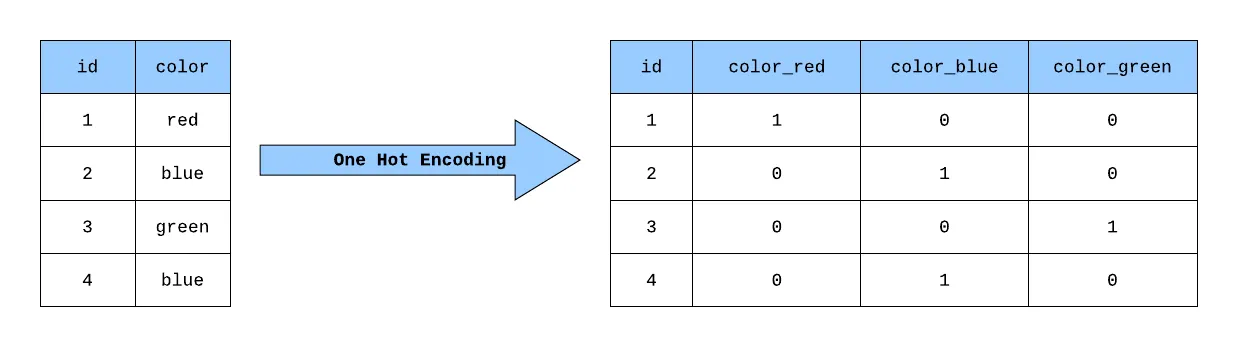

`pip install scikit-learn` or \
`conda install scikit-learn`


<!-- sci entific tool kit -->
NOT SKLEARN

In [21]:
from sklearn.preprocessing import OneHotEncoder

# https://scikit-learn.org/dev/modules/generated/sklearn.preprocessing.OneHotEncoder.html

In [22]:
city = df[["City"]]
city

,City
0,Kolkata
1,Kolkata
2,Kolkata
3,Kolkata
4,Kolkata
...,...
4741,Hyderabad
4742,Hyderabad
4743,Hyderabad
4744,Hyderabad


In [23]:
ohe = OneHotEncoder(sparse_output=False)

ohe.fit(city)

OneHotEncoder(sparse_output=False)

In [24]:
city_transformed = ohe.transform(city) # fit_transform

In [25]:
city_transformed

array([[0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0.],
       ...,
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0.]])

In [26]:
pd.DataFrame(city_transformed)

,0,1,2,3,4,5
0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...
4741,0.0,0.0,0.0,1.0,0.0,0.0
4742,0.0,0.0,0.0,1.0,0.0,0.0
4743,0.0,0.0,0.0,1.0,0.0,0.0
4744,0.0,0.0,0.0,1.0,0.0,0.0


In [27]:
ohe.get_feature_names_out()

array(['City_Bangalore', 'City_Chennai', 'City_Delhi', 'City_Hyderabad',
       'City_Kolkata', 'City_Mumbai'], dtype=object)

In [28]:
encoded_city = pd.DataFrame(city_transformed, columns=ohe.get_feature_names_out())
encoded_city

,City_Bangalore,City_Chennai,City_Delhi,City_Hyderabad,City_Kolkata,City_Mumbai
0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...
4741,0.0,0.0,0.0,1.0,0.0,0.0
4742,0.0,0.0,0.0,1.0,0.0,0.0
4743,0.0,0.0,0.0,1.0,0.0,0.0
4744,0.0,0.0,0.0,1.0,0.0,0.0


In [29]:
pd.concat([df, encoded_city], axis=1)

,BHK,Rent,Size,Area Type,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact,City_Bangalore,City_Chennai,City_Delhi,City_Hyderabad,City_Kolkata,City_Mumbai
0,2,10000,1100,Super Area,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner,0.0,0.0,0.0,0.0,1.0,0.0
1,2,20000,800,Super Area,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,0.0,0.0,0.0,0.0,1.0,0.0
2,2,17000,1000,Super Area,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,0.0,0.0,0.0,0.0,1.0,0.0
3,2,10000,800,Super Area,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner,0.0,0.0,0.0,0.0,1.0,0.0
4,2,7500,850,Carpet Area,Kolkata,Unfurnished,Bachelors,1,Contact Owner,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4741,2,15000,1000,Carpet Area,Hyderabad,Semi-Furnished,Bachelors/Family,2,Contact Owner,0.0,0.0,0.0,1.0,0.0,0.0
4742,3,29000,2000,Super Area,Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Owner,0.0,0.0,0.0,1.0,0.0,0.0
4743,3,35000,1750,Carpet Area,Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Agent,0.0,0.0,0.0,1.0,0.0,0.0
4744,3,45000,1500,Carpet Area,Hyderabad,Semi-Furnished,Family,2,Contact Agent,0.0,0.0,0.0,1.0,0.0,0.0


### Problem with OHE

In [30]:
encoded_city

,City_Bangalore,City_Chennai,City_Delhi,City_Hyderabad,City_Kolkata,City_Mumbai
0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...
4741,0.0,0.0,0.0,1.0,0.0,0.0
4742,0.0,0.0,0.0,1.0,0.0,0.0
4743,0.0,0.0,0.0,1.0,0.0,0.0
4744,0.0,0.0,0.0,1.0,0.0,0.0


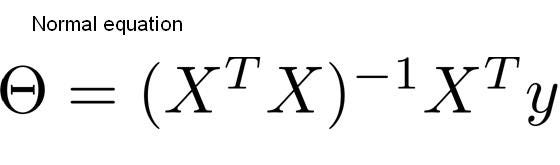

In [ ]:
encoded_city.iloc[:, :-1]#.sum(axis=1)

0       1.0
1       1.0
2       1.0
3       1.0
4       1.0
       ... 
4741    1.0
4742    1.0
4743    1.0
4744    1.0
4745    1.0
Length: 4746, dtype: float64

In [34]:
1 - encoded_city.iloc[:, :-1].sum(axis=1)

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
4741    0.0
4742    0.0
4743    0.0
4744    0.0
4745    0.0
Length: 4746, dtype: float64

In [35]:
sum_of_rest = encoded_city.iloc[:, :-1].sum(axis=1)

In [36]:
res = 1 - sum_of_rest

In [37]:
encoded_city.iloc[:, -1] == res

0       True
1       True
2       True
3       True
4       True
        ... 
4741    True
4742    True
4743    True
4744    True
4745    True
Length: 4746, dtype: bool

In [38]:
all(encoded_city.iloc[:, -1] == res)

True

In [39]:
import numpy as np

In [40]:
X_X_t = encoded_city @ encoded_city.T

In [41]:
np.linalg.inv(X_X_t)

LinAlgError: Singular matrix

In [42]:
np.linalg.det(X_X_t)

0.0

#### Removing duplicates (det)

In [43]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
4741    False
4742    False
4743    False
4744    False
4745    False
Length: 4746, dtype: bool

In [44]:
np.any(df.duplicated())

True

In [46]:
df[~df.duplicated]

TypeError: bad operand type for unary ~: 'method'

In [47]:
df = df[~df.duplicated()]

### Solution

In [48]:
ohe = OneHotEncoder(sparse_output=False, drop="first")

encoded_city_fixed = ohe.fit_transform(city)


In [49]:
pd.DataFrame(encoded_city_fixed, columns=ohe.get_feature_names_out())

,City_Chennai,City_Delhi,City_Hyderabad,City_Kolkata,City_Mumbai
0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...
4741,0.0,0.0,1.0,0.0,0.0
4742,0.0,0.0,1.0,0.0,0.0
4743,0.0,0.0,1.0,0.0,0.0
4744,0.0,0.0,1.0,0.0,0.0


### OHE with Pandas

In [50]:
pd.get_dummies(city)

,City_Bangalore,City_Chennai,City_Delhi,City_Hyderabad,City_Kolkata,City_Mumbai
0,False,False,False,False,True,False
1,False,False,False,False,True,False
2,False,False,False,False,True,False
3,False,False,False,False,True,False
4,False,False,False,False,True,False
...,...,...,...,...,...,...
4741,False,False,False,True,False,False
4742,False,False,False,True,False,False
4743,False,False,False,True,False,False
4744,False,False,False,True,False,False


In [51]:
pd.get_dummies(city, drop_first=True)

,City_Chennai,City_Delhi,City_Hyderabad,City_Kolkata,City_Mumbai
0,False,False,False,True,False
1,False,False,False,True,False
2,False,False,False,True,False
3,False,False,False,True,False
4,False,False,False,True,False
...,...,...,...,...,...
4741,False,False,True,False,False
4742,False,False,True,False,False
4743,False,False,True,False,False
4744,False,False,True,False,False


## LabelEncoding

In [78]:
furnish = df["Furnishing Status"]

In [79]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

furnish_le = le.fit_transform(furnish)
furnish_le

array([2, 1, 1, ..., 1, 1, 2])

In [80]:
df["Furnish_le"] = furnish_le

df

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact,Furnish_le
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner,2
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,1
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,1
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner,2
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4741,2022-05-18,2,15000,1000,3 out of 5,Carpet Area,Bandam Kommu,Hyderabad,Semi-Furnished,Bachelors/Family,2,Contact Owner,1
4742,2022-05-15,3,29000,2000,1 out of 4,Super Area,"Manikonda, Hyderabad",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Owner,1
4743,2022-07-10,3,35000,1750,3 out of 5,Carpet Area,"Himayath Nagar, NH 7",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Agent,1
4744,2022-07-06,3,45000,1500,23 out of 34,Carpet Area,Gachibowli,Hyderabad,Semi-Furnished,Family,2,Contact Agent,1


In [82]:
df.drop_duplicates("Furnishing Status")

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact,Furnish_le
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner,2
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,1
12,2022-05-14,1,6500,250,1 out of 4,Carpet Area,"Tarulia, Keshtopur",Kolkata,Furnished,Bachelors,1,Contact Owner,0


In [83]:
df.value_counts("Area Type")

Area Type
Super Area     2446
Carpet Area    2298
Built Area        2
Name: count, dtype: int64

In [ ]:
area_type_le = le.fit_transform(df["Area Type"])


In [ ]:
df["area_type_le"] = area_type_le

In [ ]:
df.drop_duplicates("Area Type")

### Problem with LE
Super Area - Built Area	= 2 * Carpet Area





## Solution - Ordinal Encoding

In [84]:
mappings = {
    "Unfurnished": 0,
    "Semi-Furnished": 0.5,
    "Furnished": 1
}

df["Furnishing OE"] = df["Furnishing Status"].map(mappings)

In [85]:
df

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact,Furnish_le,Furnishing OE
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner,2,0.0
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,1,0.5
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,1,0.5
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner,2,0.0
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner,2,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4741,2022-05-18,2,15000,1000,3 out of 5,Carpet Area,Bandam Kommu,Hyderabad,Semi-Furnished,Bachelors/Family,2,Contact Owner,1,0.5
4742,2022-05-15,3,29000,2000,1 out of 4,Super Area,"Manikonda, Hyderabad",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Owner,1,0.5
4743,2022-07-10,3,35000,1750,3 out of 5,Carpet Area,"Himayath Nagar, NH 7",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Agent,1,0.5
4744,2022-07-06,3,45000,1500,23 out of 34,Carpet Area,Gachibowli,Hyderabad,Semi-Furnished,Family,2,Contact Agent,1,0.5


## Target Encoding (BE CAREFULL!!!)

https://www.youtube.com/watch?v=589nCGeWG1w

In [86]:
df["Point of Contact"].value_counts()

Point of Contact
Contact Owner      3216
Contact Agent      1529
Contact Builder       1
Name: count, dtype: int64

In [87]:
df.groupby("Point of Contact")["Rent"].mean()

Point of Contact
Contact Agent      73481.158927
Contact Builder     5500.000000
Contact Owner      16704.206468
Name: Rent, dtype: float64

`pip install category_encoders`
https://contrib.scikit-learn.org/category_encoders/

In [ ]:
!pip install category_encoders

In [ ]:
!pip uninstall -y scikit-learn
!pip install scikit-learn==1.5.2

In [ ]:
!pip install category_encoders==2.5.0


In [ ]:
import category_encoders as ce

col = "Point of Contact"

target_enc = ce.TargetEncoder(cols=[col])

target_enc.fit(df[col], df['Rent'])

df['Point_of_Coutact_encoded'] = target_enc.transform(df[col])


In [ ]:
df

In [ ]:
df.groupby("Point of Contact")["Rent"].mean()

## Some preprocessing

In [ ]:
df["Area Type"].value_counts()

In [ ]:
df = df[df["Area Type"] != "Built Area"]

df["Area Type"].value_counts()

In [ ]:
df["Point of Contact"].value_counts()

In [37]:
df = df[df["Point of Contact"] != "Contact Builder"]

## Putting all together

In [ ]:
df.drop(columns=["Point_of_Coutact_encoded"], inplace=True)

In [91]:
COLS_OHE = ["Area Type", "City", "Tenant Preferred", \
            "Point of Contact"]


In [ ]:
data_OHE = pd.get_dummies(df[COLS_OHE], drop_first=True)

In [44]:
df = pd.concat([df, data_OHE], axis=1)

In [45]:
df.drop(columns=COLS_OHE, inplace=True)

In [93]:
mappings = {
    "Unfurnished": 0,
    "Semi-Furnished": 0.5,
    "Furnished": 1
}
df["Furnishing Status"] = df["Furnishing Status"].map(mappings)

In [ ]:
df

# Linear Regression with Scikit-learn

In [ ]:
df

In [88]:
df = df[["BHK", "Rent",	"Size",	"Bathroom"]]

In [89]:
X = df
y = df["Rent"]

In [90]:
X.head(1)

,BHK,Rent,Size,Bathroom
0,2,10000,1100,2


In [91]:
y.head(1)

0    10000
Name: Rent, dtype: int64

In [92]:
from sklearn.linear_model import LinearRegression
# statsmodel, xgboost

In [ ]:
X

In [93]:
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [94]:
print("Intercept:", model.intercept_)
print("Coefficient(s):", model.coef_)

Intercept: 7.275957614183426e-12
Coefficient(s): [-1.47712008e-11  1.00000000e+00 -6.34955518e-16  1.68842647e-12]


In [95]:
print("Intercept:", model.intercept_)
print("Coefficient(s):", model.coef_)

coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
})

coef_df

Intercept: 7.275957614183426e-12
Coefficient(s): [-1.47712008e-11  1.00000000e+00 -6.34955518e-16  1.68842647e-12]


,Feature,Coefficient
0,BHK,-1.477120e-11
1,Rent,1.000000e+00
2,Size,-6.349555e-16
3,Bathroom,1.688426e-12


In [99]:
pd.options.display.float_format = '{:.6f}'.format
# pd.options.display.max_columns = 1000

In [102]:
print(coef_df)

    Feature  Coefficient
0       BHK    -0.000000
1      Rent     1.000000
2      Size    -0.000000
3  Bathroom     0.000000


In [ ]:
Rent = 0 * ameninch + 1 * Rent

### Fixing issue

In [ ]:
X

In [ ]:
X = df.drop(columns=["Rent"])
y = df["Rent"]

model = LinearRegression()
model.fit(X, y)

print("Intercept:", model.intercept_)
print("Coefficient(s):", model.coef_)

coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
})

coef_df

Intercept: -38793.04450511425
Coefficient(s): [-1.54691474e+03  2.42409133e+01  2.72435614e+04]


,Feature,Coefficient
0,BHK,-1546.914739
1,Size,24.240913
2,Bathroom,27243.561381


In [ ]:
-38793 + BHK * -1546 + Size * 24

### Interpreting coefficents

**Note**
- In practice, we would first of all evaluate our model, and only then try to interpret it.

$y_{initial} = \theta_0 + \theta_1 * x_1 + \theta_2 * x_2$

Increase $x_1$ by 1

$y_{new} = \theta_0 + \theta_1 * (x_1 + 1) + \theta_2 * x_2 = \theta_0 + \theta_1 * x_1 + \theta_2 * x_2 + \theta_1 = y_{initial} + \theta_1 $ 

$y_{new} - y_{initial} = \theta_1$

c. p centrus parabus (keeping other variables constant)

In [105]:
coef_df.sort_values("Coefficient", ascending=False)

,Feature,Coefficient
2,Bathroom,27243.561381
1,Size,24.240913
0,BHK,-1546.914739


**Size = 39.747316**
- For each additional square meter (or whichever unit “Size” represents), the rent on average increases by about 39.75 units of currency, holding other factors constant. (c. p)

**City_Hyderabad = -15172.606293**
- Being in Hyderabad (vs. baseline) on average leads to a 15172.61 decrease in predicted rent on average c. p.

**Note**
- Ceteris paribus (a Latin phrase, meaning "other things equal"))


**Important**: We should not just sort the values, but rather sort them based on their absolute value

In [ ]:
coef_df.sort_values("Coefficient", key=abs, ascending=False)


Why is size so not important, it does not make any sense

In [106]:
df[["Size", "Bathroom"]].describe()

,Size,Bathroom
count,4746.000000,4746.000000
mean,967.490729,1.965866
std,634.202328,0.884532
min,10.000000,1.000000
25%,550.000000,1.000000
50%,850.000000,2.000000
75%,1200.000000,2.000000
max,8000.000000,10.000000


# Feature Scaling

In [107]:
px.histogram(df, ["Size", "Bathroom"])

Outlier 

## Min Max Scaling

In [ ]:
1, 5, 10

/ 10

0.1, 0.5, 1

1, 5, 1000000
0......1, 0....5

In [ ]:
-1000, 1, 5, 10
# 0.9,0.99, 1
-100, 0.1, 0.5, 1

---
0, 100.1, 100.5, 100.1

0, 0.99, 0.995, 1

In [108]:
px.histogram(df, "Size")

In [109]:
def min_max_scale(df, col):
    return (df[col] - df[col].min()) / (df[col].max() - df[col].min())

df["Size_min_max"] = min_max_scale(df, "Size")
df["Bathroom_min_max"] = min_max_scale(df, "Bathroom")

px.histogram(df, ["Size_min_max", "Bathroom_min_max"])


C:\Users\hayk_\AppData\Local\Temp\ipykernel_19192\1506725833.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\hayk_\AppData\Local\Temp\ipykernel_19192\1506725833.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [110]:

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaler.fit(df[['Size', 'Bathroom']])

scaled_data = scaler.transform(df[['Size', 'Bathroom']])

df[['Size_minmax', 'Bathroom_minmax']] = scaled_data

df.iloc[:,-4:]

C:\Users\hayk_\AppData\Local\Temp\ipykernel_19192\710089726.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\hayk_\AppData\Local\Temp\ipykernel_19192\710089726.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Size_min_max,Bathroom_min_max,Size_minmax,Bathroom_minmax
0,0.136421,0.111111,0.136421,0.111111
1,0.098874,0.000000,0.098874,0.000000
2,0.123905,0.000000,0.123905,0.000000
3,0.098874,0.000000,0.098874,0.000000
4,0.105131,0.000000,0.105131,0.000000
...,...,...,...,...
4741,0.123905,0.111111,0.123905,0.111111
4742,0.249061,0.222222,0.249061,0.222222
4743,0.217772,0.222222,0.217772,0.222222
4744,0.186483,0.111111,0.186483,0.111111


## Standard Scaling
ToDo - add plit showing the transformation

In [ ]:
Standard normal -> N(0, 1)

2, 3, 4 -> 3

999, 1000, 1001 -> 1000



In [111]:
def standard_scale(df, col):
    """
    Standardize a single column to have mean 0 and std dev 1:
         z = (x - mean) / std
    """
    return (df[col] - df[col].mean()) / df[col].std()

df["Size_std_manual"] = standard_scale(df, "Size")
df["Bathroom_std_manual"] = standard_scale(df, "Bathroom")


C:\Users\hayk_\AppData\Local\Temp\ipykernel_19192\2451075589.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\hayk_\AppData\Local\Temp\ipykernel_19192\2451075589.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [112]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(df[['Size', 'Bathroom']])

scaled_data = scaler.transform(df[['Size', 'Bathroom']])

df[['Size_standard', 'Bathroom_standard']] = scaled_data

df.iloc[:, -4:]


C:\Users\hayk_\AppData\Local\Temp\ipykernel_19192\634967286.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\hayk_\AppData\Local\Temp\ipykernel_19192\634967286.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Size_std_manual,Bathroom_std_manual,Size_standard,Bathroom_standard
0,0.208938,0.038590,0.208960,0.038594
1,-0.264097,-1.091952,-0.264125,-1.092067
2,0.051260,-1.091952,0.051265,-1.092067
3,-0.264097,-1.091952,-0.264125,-1.092067
4,-0.185257,-1.091952,-0.185277,-1.092067
...,...,...,...,...
4741,0.051260,0.038590,0.051265,0.038594
4742,1.628044,1.169132,1.628216,1.169255
4743,1.233848,1.169132,1.233978,1.169255
4744,0.839652,0.038590,0.839741,0.038594


In [113]:
px.histogram(df, ["Size_std_manual", "Bathroom_std_manual"])

In [116]:
df

,BHK,Rent,Size,Bathroom,Size_min_max,Bathroom_min_max,Size_minmax,Bathroom_minmax,Size_std_manual,Bathroom_std_manual,Size_standard,Bathroom_standard
0,2,10000,1100,2,0.136421,0.111111,0.136421,0.111111,0.208938,0.038590,0.208960,0.038594
1,2,20000,800,1,0.098874,0.000000,0.098874,0.000000,-0.264097,-1.091952,-0.264125,-1.092067
2,2,17000,1000,1,0.123905,0.000000,0.123905,0.000000,0.051260,-1.091952,0.051265,-1.092067
3,2,10000,800,1,0.098874,0.000000,0.098874,0.000000,-0.264097,-1.091952,-0.264125,-1.092067
4,2,7500,850,1,0.105131,0.000000,0.105131,0.000000,-0.185257,-1.091952,-0.185277,-1.092067
...,...,...,...,...,...,...,...,...,...,...,...,...
4741,2,15000,1000,2,0.123905,0.111111,0.123905,0.111111,0.051260,0.038590,0.051265,0.038594
4742,3,29000,2000,3,0.249061,0.222222,0.249061,0.222222,1.628044,1.169132,1.628216,1.169255
4743,3,35000,1750,3,0.217772,0.222222,0.217772,0.222222,1.233848,1.169132,1.233978,1.169255
4744,3,45000,1500,2,0.186483,0.111111,0.186483,0.111111,0.839652,0.038590,0.839741,0.038594


In [117]:
df_scaled = df[["BHK", "Size_standard","Bathroom_standard"]]

In [119]:
X = df_scaled#.drop(columns=["Rent"])
y = df["Rent"]

model = LinearRegression()
model.fit(X, y)

print("Intercept:", model.intercept_)
print("Coefficient(s):", model.coef_)

coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
})

coef_df

Intercept: 38217.00521962237
Coefficient(s): [-1546.91473937 15372.02391618 24095.25384968]


,Feature,Coefficient
0,BHK,-1546.914739
1,Size_standard,15372.023916
2,Bathroom_standard,24095.253850


In [ ]:
1 - 100000000
1 - 1.1

x, y

# Train Test Split

In [52]:
import numpy as np
import pandas as pd

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


import plotly.express as px
import plotly.graph_objects as go


In [53]:
np.random.seed(509)

num_samples = 100
theta_0_true = 4
theta_1_true = 3

X = np.random.rand(num_samples, 1)
y = theta_0_true + theta_1_true * X
df = pd.DataFrame({'x': X.flatten(), 'y': y.flatten()})
df

,x,y
0,0.755873,6.267619
1,0.250878,4.752635
2,0.705838,6.117513
3,0.377670,5.133011
4,0.722901,6.168702
...,...,...
95,0.384609,5.153826
96,0.804502,6.413507
97,0.626121,5.878364
98,0.838703,6.516109


In [54]:
px.scatter(df, "x", "y")

### SETTING THE SEED IS IMPORTANT

In [55]:
import numpy as np

np.random.seed(1)

print(np.random.randint(1,100))
print(np.random.randint(1,100))

38
13


#### Adding noise

In [56]:
np.random.seed(50004)

X = np.random.rand(200, 1)
y = theta_0_true + theta_1_true * X + np.random.randn(200, 1) / 3
df = pd.DataFrame({'x': X.flatten(), 'y': y.flatten()})

In [57]:
x_vals = np.linspace(0, 1, 100)
y_vals = theta_0_true + theta_1_true * x_vals

fig = px.scatter(df, "x", "y")

fig.add_trace(go.Scatter(x=x_vals, y=y_vals, mode='lines', name='True Line'))

fig.show()



#### First work with a few points

In [58]:
df_small = df.sort_values("x").head(3)
df_small

,x,y
193,0.000035,4.266323
5,0.007691,3.423349
167,0.009319,3.936942


In [59]:
# show fig but xlim to 0.012
fig.update_layout(xaxis=dict(range=[df_small.x.min()-0.01, df_small.x.max()+0.01]), 
                  yaxis=dict(range=[df_small.y.min()-0.01, df_small.y.max()+0.01]))
fig.show()

In [60]:
X = df_small[["x"]]
y = df_small["y"]

#### 10th degree polynomial

In [61]:
data = pd.DataFrame()

data["intercept"] = np.ones(7)
data["x"] = np.array([1,2,3,4,5,6,7])
data["x2"] = data["x"] ** 2
data["x3"] = data["x"] ** 3

data

,intercept,x,x2,x3
0,1.0,1,1,1
1,1.0,2,4,8
2,1.0,3,9,27
3,1.0,4,16,64
4,1.0,5,25,125
5,1.0,6,36,216
6,1.0,7,49,343


In [62]:
from sklearn.preprocessing import PolynomialFeatures

X = df_small[["x"]]
y = df_small["y"]

x_vals = np.linspace(X.min(), X.max(), 100).reshape(-1,1)

# Polynomial regression
poly = PolynomialFeatures(degree=3)
X_poly = poly.fit_transform(X)
model_poly = LinearRegression()
model_poly.fit(X_poly, y)

LinearRegression()

In [63]:
model_poly.coef_

array([-1.15943521e-09, -4.64230870e+02,  4.58301265e+04,  7.81205706e+02])

In [64]:
1 * -1.159 + 8 + -4.64 + 8^^2 4.58301265e

SyntaxError: invalid decimal literal (2387924298.py, line 1)

In [65]:
pd.DataFrame(X_poly), y

(     0         1             2             3
 0  1.0  0.000035  1.212560e-09  4.222358e-14
 1  1.0  0.007691  5.915409e-05  4.549641e-07
 2  1.0  0.009319  8.684297e-05  8.092860e-07,
 193    4.266323
 5      3.423349
 167    3.936942
 Name: y, dtype: float64)

In [66]:
from sklearn.preprocessing import PolynomialFeatures

X = df_small[["x"]]
y = df_small["y"]

x_vals = np.linspace(X.min(), X.max(), 100).reshape(-1,1)

# X = pd.DataFrame(np.array([1,2,3]))
# Polynomial regression
poly = PolynomialFeatures(degree=10)
X_poly = poly.fit_transform(X)

# print(X)
# print(pd.DataFrame(X_poly))

model_poly = LinearRegression()
model_poly.fit(X_poly, y)

# Predictions for polynomial regression
x_vals_poly = poly.transform(x_vals)
y_pred_poly = model_poly.predict(x_vals_poly)

# Linear regression
model_line = LinearRegression()
model_line.fit(X, y)

# Predictions for linear regression
y_pred_line = model_line.predict(x_vals)

# Plotting
fig = px.scatter(df_small, "x", "y", title="Actual Data, True Line, Line Fit, and Poly Fit")
fig.add_trace(go.Scatter(x=x_vals.flatten(), y=theta_0_true + theta_1_true * x_vals.flatten(), mode='lines', name='True Line'))
fig.add_trace(go.Scatter(x=x_vals.flatten(), y=y_pred_poly.flatten(), mode='lines', name='Poly Fit'))
fig.add_trace(go.Scatter(x=x_vals.flatten(), y=y_pred_line.flatten(), mode='lines', name='Line Fit'))
fig.show()


c:\Users\hayk_\.conda\envs\thesis\lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but PolynomialFeatures was fitted with feature names

c:\Users\hayk_\.conda\envs\thesis\lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



In [67]:
X_all = df[["x"]]
y_all = df["y"]

# predict the models on all data
y_pred_line_all = model_line.predict(X_all)
y_pred_poly_all = model_poly.predict(poly.transform(X_all))

# plot the predictions
fig = px.scatter(df, "x", "y", title="Actual Data, Line Fit, Poly Fit")
fig.add_trace(go.Scatter(x=df["x"], y=y_pred_line_all.flatten(), mode='markers', name='Line Fit'))
fig.add_trace(go.Scatter(x=df["x"], y=y_pred_poly_all.flatten(), mode='markers', name='Poly Fit'))
fig.add_trace(go.Scatter(x=x_vals.flatten(), y=theta_0_true + theta_1_true * x_vals.flatten(), mode='lines', name='True Line'))

fig.show()


#### Errors

In [68]:
small_line_mse = mean_squared_error(y, model_line.predict(X))
small_poly_mse = mean_squared_error(y, model_poly.predict(poly.transform(X)))

all_line_mse = mean_squared_error(y_all, model_line.predict(X_all))
all_poly_mse = mean_squared_error(y_all, model_poly.predict(poly.transform(X_all)))

print(f"Small Data MSE - Line: {small_line_mse:.5f}")
print(f"Small Data MSE - Poly: {small_poly_mse:.5f}")
print()
print(f"All Data MSE - Line: {all_line_mse:.5f}")
print(f"All Data MSE - Poly: {all_poly_mse:.5f}")

Small Data MSE - Line: 0.06360
Small Data MSE - Poly: 0.00000

All Data MSE - Line: 1197.68639
All Data MSE - Poly: 370576183.33468


### Solution - split the data

In [69]:
num_samples = 30

X = np.random.rand(num_samples, 1)
y = theta_0_true + theta_1_true * X + np.random.randn(num_samples, 1) / 3

df = pd.DataFrame({'x': X.flatten(), 'y': y.flatten()})

X = df[["x"]]
y = df["y"]
px.scatter(df, "x", "y")


In [70]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=509)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((24, 1), (6, 1), (24,), (6,))

In [71]:
# Linear regression
model_line = LinearRegression()
model_line.fit(X_train, y_train)

y_train_pred_line = model_line.predict(X_train)
y_test_pred_line = model_line.predict(X_test)

# Polynomial regression
model_poly = LinearRegression()
poly = PolynomialFeatures(degree=40)
poly.fit(X_train)

model_poly.fit(poly.transform(X_train), y_train)

y_train_pred_poly = model_poly.predict(poly.transform(X_train))

y_test_pred_poly = model_poly.predict(poly.transform(X_test))

#### Just a line

In [72]:
print("Train MSE - Line:", mean_squared_error(y_train, y_train_pred_line))
print("Test MSE - Line:", mean_squared_error(y_test, y_test_pred_line))
print()
print("Train MSE - Poly:", mean_squared_error(y_train, y_train_pred_poly))
print("Test MSE - Poly:", mean_squared_error(y_test, y_test_pred_poly))

import plotly.express as px

# Bar plots for Train and Test MSE
mse_data = {
    'Data': ['Train', 'Test'],
    'Line': [mean_squared_error(y_train, y_train_pred_line), mean_squared_error(y_test, y_test_pred_line)],
    'Poly': [mean_squared_error(y_train, y_train_pred_poly), mean_squared_error(y_test, y_test_pred_poly)]
}

mse_df = pd.DataFrame(mse_data)

fig = px.bar(mse_df, x='Data', y=['Line', 'Poly'], barmode='group', title='Train and Test MSE for Line and Poly Models')
fig.update_layout(yaxis_title='Mean Squared Error')
fig.show()

Train MSE - Line: 0.08503000584047282
Test MSE - Line: 0.06293227999615157

Train MSE - Poly: 0.006204590907118421
Test MSE - Poly: 378832.97000561305


In [73]:
# x_vals = np.linspace()

# Sort the dataframe by 'x' values
df_sorted = df.sort_values(by='x')

# Extrapolate model to predict the entire range of x values
y_pred_line = model_line.predict(df_sorted[['x']])
y_pred_poly = model_poly.predict(poly.transform(df_sorted[['x']]))

fig = px.scatter(df_sorted, "x", "y", title="Actual Data, Line Fit, Poly Fit")
fig.add_trace(go.Scatter(x=df_sorted["x"], y=y_pred_line.flatten(), mode='lines', name='Line Fit'))
fig.add_trace(go.Scatter(x=df_sorted["x"], y=y_pred_poly.flatten(), mode='lines', name='Poly Fit'))
fig.add_trace(go.Scatter(x=x_vals.flatten(), y=theta_0_true + theta_1_true * x_vals.flatten(), mode='lines', name='True Line'))

fig.show()


In [74]:
fig.update_layout(xaxis=dict(range=[X.min(), X.max()]), 
                  yaxis=dict(range=[y.min(), y.max()]))

# Underfitting and Overfitting


- Շարքային Սողոմոնյան - https://www.youtube.com/watch?v=pv_4MVcjEik
- Եթե կլոր ա ուրեմն մեջինը քառակուսի ա - https://www.youtube.com/watch?v=7arnxebkEUU 



## Examples

### Overfitting: Astrological Predictions in Ancient Civilizations**
**Historical Backdrop:**
From Babylonian times onward, countless astrologers meticulously charted the positions of celestial bodies, connecting them with floods, famines, victories in war, and the births of royals.

**Why it’s Overfitting:**
- Ancient astrologers often looked at every tiny “coincidence” between a planetary alignment and historical events, building extremely specific rules. (E.g., “When Mars is in Taurus and the moon is half full, there will be a great harvest if the newborn prince is left-handed!”)
- These detailed “models” fit prior observations too well, often capturing noise and coincidences rather than robust truths.

**Moral of the Story:** 
Squeezing meaning out of every alignment of the stars is like overfitting on random noise in a dataset!

### Underfitting: “Bleeding” as a Medieval Medical Treatment
**Historical Backdrop:**
For centuries, a common medical practice in Europe was bloodletting—draining blood to “rebalance the humors” and cure ailments from headaches to fevers.

**Why it’s Underfitting:**
- The medical “model” at the time was extremely simplistic: “Something’s wrong? Let’s remove blood.”
- They applied the same one-size-fits-all approach to all sorts of diseases, ignoring the huge variability between different medical conditions (and patients).
- Because the underlying theory was so rudimentary (the four humors concept), the “model” rarely fit the real complexity of physiology.
  
**Moral of the Story:**
 When your theory is too general and ignores most of the nuanced details, you’re underfitting the complexity of reality (and might end up making people worse).

### Overfitting: Your Uncle’s Hyper-Specific Sports Superstitions
**Everyday Fun Example:**
Maybe you have an uncle who insists on wearing the exact same (unwashed) socks during every big game, needs to place the remote exactly 5 inches from the TV, and can only eat “lucky peanuts” if the score is tied.

**Why it’s Overfitting:**
- He’s discovered a string of coincidences: whenever he did those specific rituals, his team happened to win.
- He’s latched onto every tiny detail—like someone building an overly complex machine-learning model that memorizes all the noise in the training data.
- The moment “new data” arrives—i.e., the team loses despite the lucky peanuts—his model is proven to have no real predictive power.

**Moral of the Story:** 
If your “model” requires that many hyper-specific conditions to “succeed,” it’s probably not robust!

## Demo

In [5]:
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# ------------------------------------------------------------------------------
# 1. Generate Synthetic Data (True degree = 3)
# ------------------------------------------------------------------------------
np.random.seed(509)
poly_degree = 20

# True polynomial function (3rd degree)
def true_function(x):
    # Example: y = 1 + 2x + 3x^2 + 4x^3, plus random noise
    return 1 + 2*x + 3*x**2 + 4*x**3 + np.random.normal(0, 20, size=x.shape)

def true_function_without_noise(x):
    return 1 + 2*x + 3*x**2 + 4*x**3

# Generate data
N = 100
X = np.linspace(-3, 3, N).reshape(-1, 1)
y = true_function(X.ravel())

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3, 
                                                    random_state=42)

# ------------------------------------------------------------------------------
# 2. Fit Polynomial Models of Degree 1 to 10 & Record MSE
# ------------------------------------------------------------------------------
degrees = range(1, poly_degree)
train_mses = []
test_mses = []
polynomial_predictions = {}  # Store predictions for plotting

# A dense grid for plotting model predictions
X_plot = np.linspace(X.min(), X.max(), 200).reshape(-1, 1)

for d in degrees:
    # Create polynomial features
    poly = PolynomialFeatures(degree=d)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly  = poly.transform(X_test)
    X_plot_poly  = poly.transform(X_plot)
    
    # Fit linear regression on polynomial features
    model = LinearRegression()
    model.fit(X_train_poly, y_train)
    
    # Predict on train and test
    y_train_pred = model.predict(X_train_poly)
    y_test_pred  = model.predict(X_test_poly)
    
    # Calculate MSE
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse  = mean_squared_error(y_test,  y_test_pred)
    
    train_mses.append(train_mse)
    test_mses.append(test_mse)
    
    # Store predictions for the plotting slider
    y_plot_pred = model.predict(X_plot_poly)
    polynomial_predictions[d] = y_plot_pred

# ------------------------------------------------------------------------------
# 3. Plot MSE vs. Polynomial Degree (Line Chart)
# ------------------------------------------------------------------------------
df_mse = {
    'Degree': list(degrees),
    'Train MSE': train_mses,
    'Test MSE': test_mses
}

fig_mse = px.line(
    df_mse, 
    x='Degree', 
    y=['Train MSE', 'Test MSE'], 
    markers=True,
    title="Train & Test MSE vs. Polynomial Degree"
)
fig_mse.update_layout(
    xaxis = dict(dtick=1),
    yaxis_title="MSE"
)

# ------------------------------------------------------------------------------
# 4. Interactive Plot: Data + Fitted Polynomials (Slider)
# ------------------------------------------------------------------------------
# We'll create a figure with:
#   - Scatter of the training data
#   - Scatter of the test data (optional, or we can mark them differently)
#   - A line that updates for each polynomial degree using frames.

# Base scatter (training data)
scatter_train = go.Scatter(
    x=X_train.ravel(), 
    y=y_train, 
    mode='markers',
    name='Train Data',
    marker=dict(color='blue', size=6)
)

# Optionally, scatter for test data
scatter_test = go.Scatter(
    x=X_test.ravel(), 
    y=y_test, 
    mode='markers',
    name='Test Data',
    marker=dict(color='red', size=6)
)

# We'll build frames for each polynomial degree
frames = []
for d in degrees:
    # Create a line trace for the polynomial prediction at degree d
    line_pred = go.Scatter(
        x=X_plot.ravel(),
        y=polynomial_predictions[d],
        mode='lines',
        line=dict(width=3),
        name=f"Degree {d} fit"
    )
    frames.append(
        go.Frame(
            data=[scatter_train, scatter_test, line_pred],
            name=str(d)
        )
    )

# Initial line (degree=1 by default)
init_line = go.Scatter(
    x=X_plot.ravel(),
    y=polynomial_predictions[1],
    mode='lines',
    line=dict(width=3),
    name=f"Degree 1 fit"
)

# Build the figure with the first frame's data
fig_poly = go.Figure(
    data=[scatter_train, scatter_test, init_line],
    layout=go.Layout(
        title="Polynomial Fits (Degree Slider)",
        xaxis=dict(title="X"),
        yaxis=dict(title="y"),
        updatemenus=[  # Slider button settings
            dict(
                type="buttons",
                showactive=False,
                x=1.15,
                y=1.15,
                xanchor="right",
                yanchor="top",
                buttons=[
                    dict(label="Play",
                         method="animate",
                         args=[None, 
                               dict(frame=dict(duration=500, redraw=True),
                                    fromcurrent=True,
                                    transition=dict(duration=300)
                                   )
                              ]
                        )
                ]
            )
        ],
        # We'll define sliders next
        sliders=[{
            'currentvalue': {'prefix': 'Degree: ', 'xanchor': 'right'},
            'steps': [
                {
                    'label': str(d),
                    'method': 'animate',
                    'args': [[str(d)], 
                             dict(mode='immediate',
                                  frame=dict(duration=300, redraw=True),
                                  transition=dict(duration=300))]
                }
                for d in degrees
            ]
        }]
    ),
    frames=frames
)

# add the true function to fig_poly
true_y = true_function_without_noise(X_plot.ravel())
fig_poly.add_trace(go.Scatter(x=X_plot.ravel(), y=true_y, mode='lines', name='True Function'))




# ------------------------------------------------------------------------------
# 5. Show the plots
# ------------------------------------------------------------------------------
fig_poly.show()
fig_mse.show()


## Bias Variance decomposition
https://scott.fortmann-roe.com/docs/BiasVariance.html

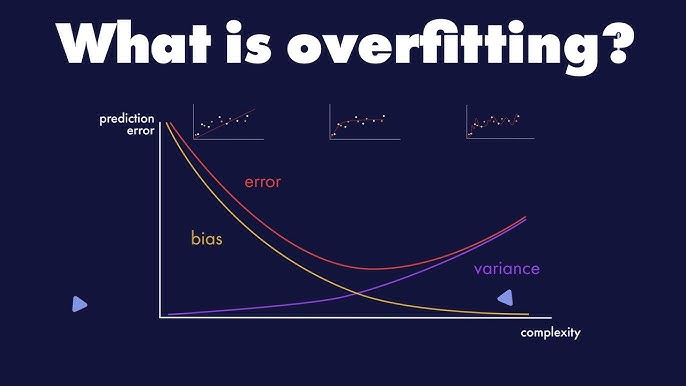

In [ ]:
x_vals

# Evaluation

## Classics
Go to PDF `ml\Chapter 1 Regression Main Concepts\PDF\L02 Regression Losses.pdf`"

## Pearson and Spearman Correlation

In [1]:
### Pearson's vs Spearman's Correlation in Python
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import pearsonr, spearmanr

# Generate sample data
np.random.seed(509)
x = np.linspace(1, 100, 100)
y_linear = 2 * x + np.random.normal(0, 10, size=len(x))  # Linear relationship
y_monotonic = np.log(x) + np.random.normal(0, 0.2, size=len(x))  # Monotonic but not linear
y_outlier = y_linear.copy()
y_outlier[-1] += 50_900  # Add an outlier

In [2]:
# Calculate correlation values
pearson_linear = pearsonr(x, y_linear)[0]
spearman_linear = spearmanr(x, y_linear)[0]

pearson_monotonic = pearsonr(x, y_monotonic)[0]
spearman_monotonic = spearmanr(x, y_monotonic)[0]

pearson_outlier = pearsonr(x, y_outlier)[0]
spearman_outlier = spearmanr(x, y_outlier)[0]

In [3]:
import plotly.express as px
import plotly.graph_objects as go

# Pearson's linear correlation example
fig1 = px.scatter(x=x, y=y_linear, title=f"Linear Relationship | Pearson - {pearson_linear:.2f} | Spearman - {spearman_linear:.2f}")
fig1.add_trace(go.Scatter(x=x, y=y_linear, mode='markers'))
fig1.update_layout(xaxis_title="X", yaxis_title="Y")
fig1.show()

# Spearman's monotonic relationship example
fig2 = px.scatter(x=x, y=y_monotonic, title=f"Monotonic Relationship | Pearson - {pearson_monotonic:.2f} | Spearman - {spearman_monotonic:.2f}")
fig2.add_trace(go.Scatter(x=x, y=y_monotonic, mode='markers'))
fig2.update_layout(xaxis_title="X", yaxis_title="Y (Rank-based)")
fig2.show()

# Pearson with outlier example
fig3 = px.scatter(x=x, y=y_outlier, title=f"Outlier | Pearson - {pearson_outlier:.2f} | Spearman - {spearman_outlier:.2f}")
fig3.add_trace(go.Scatter(x=x, y=y_outlier, mode='markers'))
fig3.update_layout(xaxis_title="X", yaxis_title="Y")
fig3.show()

# Spearman on sine wave
x = np.linspace(0, 1 * np.pi, 100)
y = np.sin(x)

pearson_sine = pearsonr(x, y)[0]
spearman_sine = spearmanr(x, y)[0]

fig4 = px.scatter(x=x, y=y, title=f"Sine Wave | Pearson - {pearson_sine:.2f} | Spearman - {spearman_sine:.2f}")
fig4.add_trace(go.Scatter(x=x, y=y, mode='markers'))
fig4.update_layout(xaxis_title="X", yaxis_title="Y")
fig4.show()


## Pearson's Correlation (r)
- Measures the **linear relationship** between two variables.
- Assumes data is normally distributed.
- **Sensitive to outliers**.
- Values range from -1 to +1:
  - **+1**: Perfect positive linear correlation.
  - **-1**: Perfect negative linear correlation.
  - **0**: No linear correlation.

### Formula:
$$
r = \frac{\sum (x_i - \bar{x})(y_i - \bar{y})}{\sqrt{\sum (x_i - \bar{x})^2 \sum (y_i - \bar{y})^2}}
$$

## Spearman's Correlation (ρ)
- Measures the **monotonic relationship** between two variables.
- Does **not assume normality** (non-parametric).
- **Robust against outliers**.
- Values range from -1 to +1:
  - **+1**: Perfect positive monotonic relationship.
  - **-1**: Perfect negative monotonic relationship.
  - **0**: No monotonic relationship.

### Formula:
$$
\rho = 1 - \frac{6 \sum d_i^2}{n(n^2 - 1)}
$$
- $d_i$: Difference between ranks of $x_i$ and $y_i$.
- $n$: Number of pairs.

## When to Use:
| **Criteria**             | **Pearson**              | **Spearman**             |
|---------------------------|--------------------------|--------------------------|
| **Linear Relationship**   | Yes                     | No                      |
| **Monotonic Relationship**| No                      | Yes                     |
| **Outlier Sensitivity**   | High                    | Low                     |
| **Normality Assumption**  | Yes                     | No                      |

---
"""


## Visual evaluation + Codes

In [6]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train_poly, y_train)


y_train_pred = model.predict(X_train_poly)
y_test_pred = model.predict(X_test_poly)

In [ ]:
# https://github.com/HaykTarkhanyan/coder_moder/blob/main/ml/regression_evaluation_report.py
def evaluate_regression(actual, predictions,
    model_name=None, filename=None, notes=None,
    return_metrics=False, show_plots=False,
    show_metrics=True, plots=False, round_digits=3):
    """
    Function to evaluate a regression model.

    .. warning::
        Assumes that ``scipy``, ``sklearn``, and ``matplotlib`` are installed
        in your environment.

    This function:
        - Prints R2, MAE, MSE, RMSE metrics.
        - Prints Kendall's tau, Pearson's R, Spearman's rho correlation metrics.
        - Plots actual vs. predicted values.
        - Plots residuals vs. predicted values.
        - Plots distribution of residuals.
        - Plots predicted vs. actual distribution.
        - Saves results to file (if specified).
        - Returns metrics as a dictionary (if specified).
    Args:
        actual (array-like): Ground-truth target values.
        predictions (array-like): Model predictions.
        model_name (str, optional): Name of the model (for display/record-keeping).
        filename (str, optional): Path to an HTML file to save the results.
        notes (str, optional): Additional notes to include in the saved file (if `filename` is provided).
        return_metrics (bool, optional): If True, returns a dictionary of metrics. Defaults to False.
        show_plots (bool, optional): If True, calls `plt.show()` for each figure. Defaults to False.
        show_metrics (bool, optional): If True, prints the metrics and correlations to stdout. Defaults to True.
        plots (bool, optional): If True, generates plots. Defaults to False.
        round_digits (int, optional): Number of digits to round the metrics. Defaults to 3.

    Returns:
        dict or None: 
            A dictionary of computed metrics if `return_metrics=True`, otherwise None.
    """
    import numpy as np
    import matplotlib.pyplot as plt
    from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
    from scipy.stats import kendalltau, pearsonr, spearmanr
    from datetime import datetime
    from io import BytesIO
    import base64
    # Ensure inputs are NumPy arrays
    actual = np.array(actual)
    predictions = np.array(predictions)

    def save_figure_to_file(fig):
        """
        Helper function:
        Convert a Matplotlib figure to a base64-encoded PNG for embedding in HTML.
        """
        tmpfile = BytesIO()
        fig.savefig(tmpfile, format='png')
        encoded = base64.b64encode(tmpfile.getvalue()).decode('utf-8')
        return encoded

    # 1. Calculate regression metrics
    r2 = round(r2_score(actual, predictions), round_digits)
    mae = round(mean_absolute_error(actual, predictions), round_digits)
    mape = round(mean_absolute_percentage_error(actual, predictions), round_digits)
    mse = round(mean_squared_error(actual, predictions), round_digits)
    rmse = round(np.sqrt(mean_squared_error(actual, predictions)), round_digits)

    # 2. Calculate correlation metrics
    pearson = round(pearsonr(actual, predictions)[0], round_digits)
    spearman = round(spearmanr(actual, predictions)[0], round_digits)
    kendall = round(kendalltau(actual, predictions)[0], round_digits)

    # 3. Print metrics if needed
    if show_metrics:
        print(f"Model: {model_name or 'N/A'}")
        print(f"R2: {r2}")
        print(f"MAE: {mae}")
        print(f"MAPE: {mape}")
        print(f"MSE: {mse}")
        print(f"RMSE: {rmse}")
        print(f"Pearson Correlation: {pearson}")
        print(f"Spearman Rho: {spearman}")
        print(f"Kendall Tau: {kendall}")

    # 4. Generate plots if requested
    if plots:
        residuals = actual - predictions

        # (a) Predicted vs. Actual
        fig1 = plt.figure()
        plt.scatter(actual, predictions, edgecolor='k', alpha=0.7)
        plt.xlabel("Actual")
        plt.ylabel("Predicted")
        plt.title("Predicted vs. Actual")
        # add a diagonal line
        plt.plot([actual.min(), actual.max()], [actual.min(), actual.max()], 'k--', lw=2)
        if show_plots:
            plt.show()
        prediction_vs_actual = save_figure_to_file(fig1)
        plt.close(fig1)

        # (b) Residuals vs. Predicted
        fig2 = plt.figure()
        plt.scatter(predictions, residuals, edgecolor='k', alpha=0.7)
        plt.axhline(y=0, color='r', linestyle='--')
        plt.xlabel("Predicted")
        plt.ylabel("Residual")
        plt.title("Residuals vs. Predicted")
        if show_plots:
            plt.show()
        residuals_vs_predicted = save_figure_to_file(fig2)
        plt.close(fig2)

        # (c) Distribution of Residuals
        fig3 = plt.figure()
        plt.hist(residuals, bins=30, edgecolor='k', alpha=0.7)
        plt.xlabel("Residual")
        plt.ylabel("Count")
        plt.title("Distribution of Residuals")
        if show_plots:
            plt.show()
        residuals_distribution = save_figure_to_file(fig3)
        plt.close(fig3)

        # (d) Distribution of Predicted vs. Actual
        fig4 = plt.figure()
        plt.hist(actual, bins=30, alpha=0.5, label="Actual", edgecolor='k')
        plt.hist(predictions, bins=30, alpha=0.5, label="Predicted", edgecolor='k')
        plt.xlabel("Value")
        plt.ylabel("Count")
        plt.title("Distribution of Predicted vs. Actual")
        plt.legend()
        if show_plots:
            plt.show()
        predicted_vs_actual_distribution = save_figure_to_file(fig4)
        plt.close(fig4)

    # 5. Save results to file (HTML) if requested
    if filename:
        with open(filename, "w") as f:
            f.write(f"<html><body>\n")
            f.write(f"<h2>Report generated: {datetime.now()}</h2>\n")
            if model_name:
                f.write(f"<h2>Model Name: {model_name}</h2>\n")

            if notes:
                f.write(f"<h3>Notes:</h3>\n<p>{notes}</p>\n")

            f.write("<h3>Metrics</h3>\n")
            f.write(f"<b>R2:</b> {r2} <br>\n")
            f.write(f"<b>MAE:</b> {mae} <br>\n")
            f.write(f"<b>MAPE:</b> {mape} <br>\n")
            f.write(f"<b>MSE:</b> {mse} <br>\n")
            f.write(f"<b>RMSE:</b> {rmse} <br>\n")

            f.write("<h3>Correlations</h3>\n")
            f.write(f"Pearson: {pearson} <br>\n")
            f.write(f"Spearman: {spearman} <br>\n")
            f.write(f"Kendall Tau: {kendall} <br>\n")

            if plots:
                f.write("<h3>Plots</h3>\n")
                f.write(f'<img src="data:image/png;base64,{prediction_vs_actual}"><br><br>\n')
                f.write(f'<img src="data:image/png;base64,{residuals_vs_predicted}"><br><br>\n')
                f.write(f'<img src="data:image/png;base64,{residuals_distribution}"><br><br>\n')
                f.write(f'<img src="data:image/png;base64,{predicted_vs_actual_distribution}"><br><br>\n')

            f.write("</body></html>\n")

    # 6. Optionally return a dictionary of metrics
    if return_metrics:
        return {
            "model_name": model_name,
            "notes": notes,
            "r2": r2,
            "mae": mae,
            "mape": mape,
            "mse": mse,
            "rmse": rmse,
            "pearson": pearson,
            "spearman": spearman,
            "kendall": kendall
        }


Model: Linear Regression
R2: 0.851
MAE: 14.434
MAPE: 1.377
MSE: 352.374
RMSE: 18.772
Pearson Correlation: 0.923
Spearman Rho: 0.846
Kendall Tau: 0.683


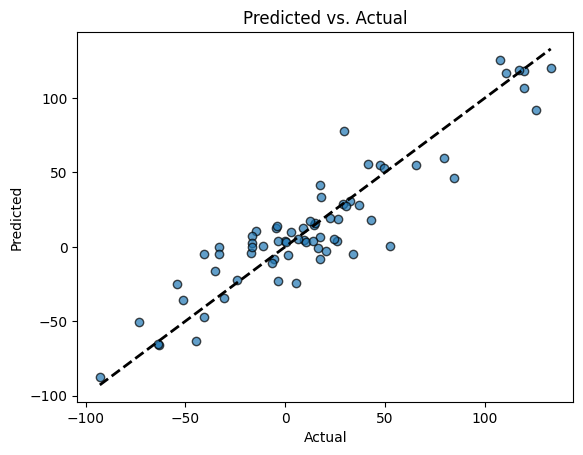

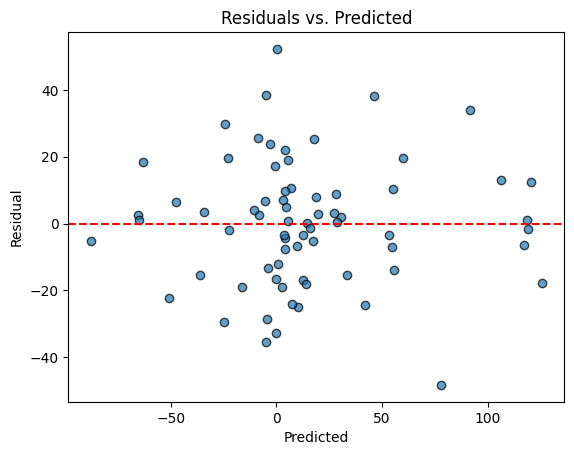

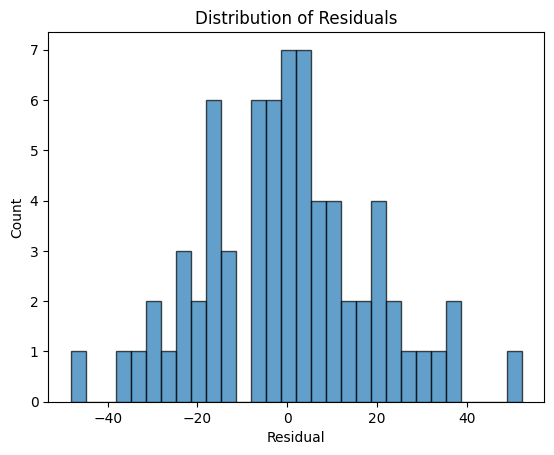

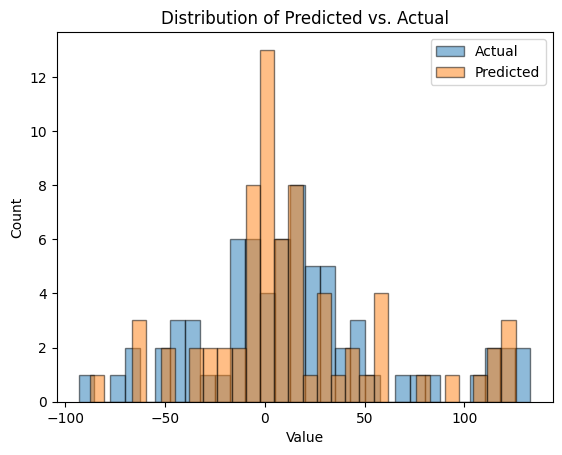

In [8]:
evaluate_regression(y_train, y_train_pred, model_name="Linear Regression", filename="report.html", show_plots=True, plots=True)

Model: Linear Regression
R2: -1.17
MAE: 33.684
MAPE: 1.183
MSE: 6155.855
RMSE: 78.459
Pearson Correlation: 0.121
Spearman Rho: 0.623
Kendall Tau: 0.526


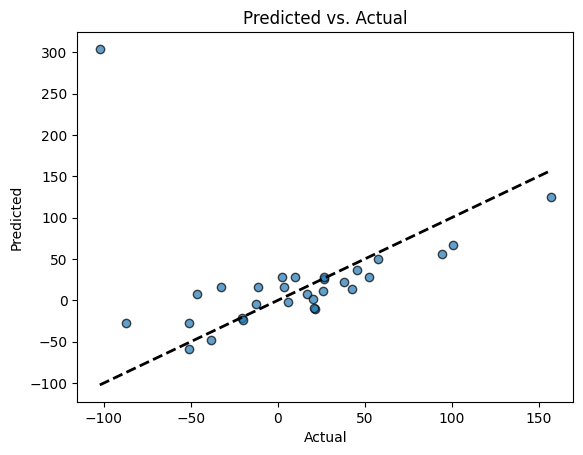

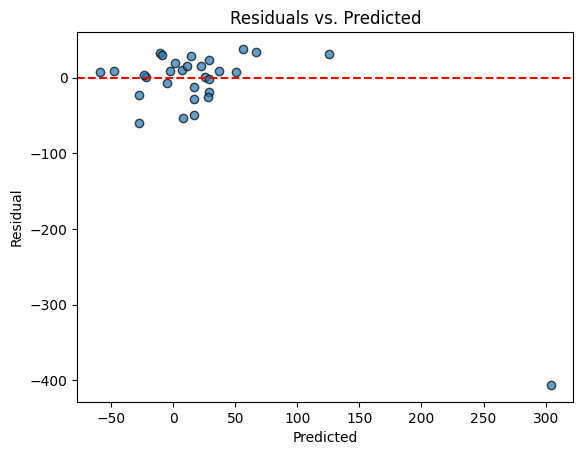

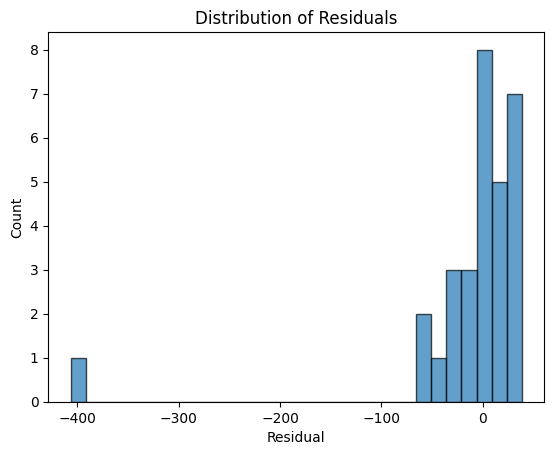

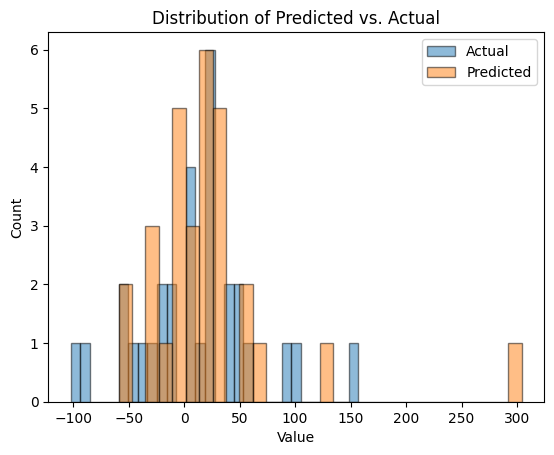

In [9]:
evaluate_regression(y_test, y_test_pred, model_name="Linear Regression", filename="report.html", show_plots=True, plots=True)

# Cross Validation
https://scikit-learn.org/1.5/modules/cross_validation.html

In [ ]:
1 2 3 4 5

1 2 3 4 | 5
1 2 3 5 | 4
1 2 4 5 | 3

# Regulaization
Go to pdf `ml\Chapter 1 Regression Main Concepts\PDF\L03 Regularization.pdf`

In [19]:
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# ------------------------------------------------------------------------------
# 1. Generate Synthetic Data (True degree = 3)
# ------------------------------------------------------------------------------
np.random.seed(509)

def true_function(x):
    # Example: y = 1 + 2x + 3x^2 + 4x^3, plus random noise
    return 1 + 2*x + 3*x**2 + 4*x**3 + np.random.normal(0, 20, size=x.shape)

def true_function_without_noise(x):
    return 1 + 2*x + 3*x**2 + 4*x**3

# Generate data
N = 100
X = np.linspace(-3, 3, N).reshape(-1, 1)
y = true_function(X.ravel())

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# ------------------------------------------------------------------------------
# 2. Fix Polynomial Degree = 20, Vary Regularization Strength (alpha)
# ------------------------------------------------------------------------------
degree = 20
model_name = "Lasso"  # "Ridge" or "Lasso"
alpha_values = [0.001, 0.01, 0.1, 1, 10, 100, 10_000]  # Example alpha (lambda) values

# Prepare polynomial features (degree=10) once
poly = PolynomialFeatures(degree=degree)
X_train_poly = poly.fit_transform(X_train)
X_test_poly  = poly.transform(X_test)

# A dense grid for plotting model predictions
X_plot = np.linspace(X.min(), X.max(), 200).reshape(-1, 1)
X_plot_poly = poly.transform(X_plot)

train_mses = []
test_mses = []
predictions = {}

# Fit a Ridge model for each alpha
for alpha_val in alpha_values:
    if model_name == "Lasso":
        model = Lasso(alpha=alpha_val)
    else:
        model = Ridge(alpha=alpha_val)
    model.fit(X_train_poly, y_train)
    
    # Compute predictions and MSE for train / test
    y_train_pred = model.predict(X_train_poly)
    y_test_pred  = model.predict(X_test_poly)
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse  = mean_squared_error(y_test,  y_test_pred)

    train_mses.append(train_mse)
    test_mses.append(test_mse)
    
    # Store predictions on the plotting grid
    y_plot_pred = model.predict(X_plot_poly)
    predictions[alpha_val] = y_plot_pred

# ------------------------------------------------------------------------------
# 3. Plot MSE vs. alpha
# ------------------------------------------------------------------------------
df_mse = {
    'Lambda (alpha)': alpha_values,
    'Train MSE': train_mses,
    'Test MSE': test_mses
}

fig_mse = px.line(
    df_mse,
    x='Lambda (alpha)',
    y=['Train MSE', 'Test MSE'],
    markers=True,
    title=f"MSE vs. Lambda (alpha) (Polynomial Degree = {degree})"
)
# Optionally make the x-axis log scale for clarity:
# fig_mse.update_layout(xaxis_type='log')
fig_mse.update_layout(yaxis_title="MSE")

# ------------------------------------------------------------------------------
# 4. Interactive Plot: Data + Fitted Polynomials (Slider over alpha)
# ------------------------------------------------------------------------------
scatter_train = go.Scatter(
    x=X_train.ravel(), 
    y=y_train, 
    mode='markers',
    name='Train Data',
    marker=dict(color='blue', size=6)
)

scatter_test = go.Scatter(
    x=X_test.ravel(), 
    y=y_test, 
    mode='markers',
    name='Test Data',
    marker=dict(color='red', size=6)
)

true_y = true_function_without_noise(X_plot.ravel())
scatter_true = go.Scatter(
    x=X_plot.ravel(),
    y=true_y,
    mode='lines',
    name='True Function',
    line=dict(dash='dash', color='black')
)

# Create frames for each alpha
frames = []
for alpha_val in alpha_values:
    line_pred = go.Scatter(
        x=X_plot.ravel(),
        y=predictions[alpha_val],
        mode='lines',
        line=dict(width=3),
        name=f"alpha={alpha_val}"
    )
    frames.append(go.Frame(data=[scatter_train, scatter_test, scatter_true, line_pred],
                           name=str(alpha_val)))

# Initial line (use the first alpha in alpha_values)
init_line = go.Scatter(
    x=X_plot.ravel(),
    y=predictions[alpha_values[0]],
    mode='lines',
    line=dict(width=3),
    name=f"alpha={alpha_values[0]}"
)

fig_poly = go.Figure(
    data=[scatter_train, scatter_test, scatter_true, init_line],
    layout=go.Layout(
        title=f"Polynomial Degree={degree} with {model_name} Regularization (Slider: alpha)",
        xaxis=dict(title="X"),
        yaxis=dict(title="y"),
        updatemenus=[
            dict(
                type="buttons",
                showactive=False,
                x=1.15,
                y=1.15,
                xanchor="right",
                yanchor="top",
                buttons=[
                    dict(label="Play",
                         method="animate",
                         args=[None,
                               dict(frame=dict(duration=500, redraw=True),
                                    fromcurrent=True,
                                    transition=dict(duration=300))])
                ]
            )
        ],
        sliders=[{
            'currentvalue': {'prefix': 'Lambda (alpha): ', 'xanchor': 'right'},
            'steps': [
                {
                    'label': str(a),
                    'method': 'animate',
                    'args': [[str(a)],
                             dict(mode='immediate',
                                  frame=dict(duration=300, redraw=True),
                                  transition=dict(duration=300))]
                } for a in alpha_values
            ]
        }]
    ),
    frames=frames
)

# ------------------------------------------------------------------------------
# 5. Show the plots
# ------------------------------------------------------------------------------
fig_poly.show()
fig_mse.show()


c:\Users\hayk_\.conda\envs\thesis\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.455e+04, tolerance: 1.657e+01

c:\Users\hayk_\.conda\envs\thesis\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.456e+04, tolerance: 1.657e+01

c:\Users\hayk_\.conda\envs\thesis\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.470e+04, tolerance: 1.657e+01

c:\Users\hayk_\.conda\envs\thesis\lib\si

In [20]:
model.coef_

array([ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  3.69823579e-03,
        7.68505403e-05,  2.29958370e-05,  1.72953193e-05, -3.68322120e-05,
        2.04327918e-07, -1.37290439e-06, -1.10147475e-07,  7.54009541e-08,
       -1.97219436e-08])